In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [452]:
colori_aggregati = pd.read_csv("Colori_aggregati.csv", encoding='utf-8')
df_esteso = pd.read_csv("Splittato_tutto.csv", encoding='utf-8')

In [453]:
colori_aggregati

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori,colori_split
0,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,white-warm white-sun struck,"['white', 'warm', 'white', 'sun', 'struck']"
1,Scarpe Sportive,35.5,uomo,PUMA,PROSPECT UNISEX - Scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,prospect unisex,scarpe da allenamento,black/yellow alert/white,"['black', 'yellow', 'alert', 'white']"
2,Scarpe Sportive,35.5,uomo,PUMA,PWR HYBRID TR UNISEX - Scarpe da allenamento -...,63.95,80.00,https://www.zalando.it/puma-pwr-hybrid-tr-unis...,pwr hybrid tr unisex,scarpe da allenamento,black- white- black,"['black', '', 'white', '', 'black']"
3,Scarpe Sportive,35.5,uomo,UNDER ARMOUR,JET '23 - Scarpe da basket - black,60.00,60.00,https://www.zalando.it/under-armour-court-perf...,jet '23,scarpe da basket,black,['black']
4,Scarpe Sportive,35.5,uomo,PUMA,ELIMINATE TURBO - Scarpe da pallamano - white/...,101.99,119.99,https://www.zalando.it/puma-eliminate-turbo-sc...,eliminate turbo,scarpe da pallamano,white/bluemazing,"['white', 'bluemazing']"
...,...,...,...,...,...,...,...,...,...,...,...,...
14266,Scarpe Sportive,47.0,donna,UNDER ARMOUR,Scarpe da corsa su strada - white,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,unknown,scarpe da corsa su strada,white,['white']
14267,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - white/black,89.99,89.99,https://www.zalando.it/puma-unisex-scarpe-da-p...,unknown,scarpe da allenamento,white/black,"['white', 'black']"
14268,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,unknown,scarpe da allenamento,sun stream black caramel latte,"['sun', 'stream', 'black', 'caramel', 'latte']"
14269,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,unknown,scarpe da allenamento,black/white,"['black', 'white']"


In [336]:
df_esteso

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori_split
0,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,white
1,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,warm
2,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,sun
3,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,struck
4,Scarpe Sportive,35.5,uomo,PUMA,PROSPECT UNISEX - Scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,prospect unisex,scarpe da allenamento,black
...,...,...,...,...,...,...,...,...,...,...,...
44463,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,unknown,scarpe da allenamento,caramel
44464,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,unknown,scarpe da allenamento,latte
44465,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,unknown,scarpe da allenamento,black
44466,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,unknown,scarpe da allenamento,white


In [338]:
colori_aggregati.info()

df_esteso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   categoria         14271 non-null  object 
 1   taglia            14271 non-null  float64
 2   genere            14271 non-null  object 
 3   marca             14271 non-null  object 
 4   nome_prodotto     14271 non-null  object 
 5   prezzo_effettivo  14271 non-null  float64
 6   prezzo_ordinario  14271 non-null  float64
 7   url_prodotto      14271 non-null  object 
 8   modello           14271 non-null  object 
 9   sport             14271 non-null  object 
 10  colori            14271 non-null  object 
 11  colori_split      14271 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44468 entries, 0 to 44467
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --

In [342]:
print("Statistiche descriptive di base:")
print(colori_aggregati.describe())
print(df_esteso.describe())

Statistiche descriptive di base:
             taglia  prezzo_effettivo  prezzo_ordinario
count  14271.000000      14271.000000      14271.000000
mean      41.605984        104.625978        116.595234
std        3.226988         45.628040         45.746708
min       35.000000         22.000000         22.950000
25%       39.500000         66.990000         79.990000
50%       41.500000         99.950000        110.000000
75%       43.000000        139.990000        149.990000
max       52.500000        255.000000        299.950000
             taglia  prezzo_effettivo  prezzo_ordinario
count  44468.000000      44468.000000      44468.000000
mean      41.595215        105.644286        118.824960
std        3.273917         47.254359         47.450351
min       35.000000         22.000000         22.950000
25%       39.000000         64.990000         79.990000
50%       41.000000         98.990000        119.950000
75%       43.000000        139.990000        150.000000
max       52.50

In [344]:
print("\nValori Unici per Colonne Categoriche:")
for col in ['marca', 'categoria', 'taglia', 'genere', 'modello', 'sport']:
    print(f"{col}: {colori_aggregati[col].nunique()} valori unici")


Valori Unici per Colonne Categoriche:
marca: 7 valori unici
categoria: 1 valori unici
taglia: 34 valori unici
genere: 2 valori unici
modello: 609 valori unici
sport: 19 valori unici


#### Siccome ogni scarpa ha una o piu taglie, raggrupiamo per vedere essattamente che modelli abbiamo raccolto
#### Per questo, vado a creare un nuovo dataframe con le informazioni necessarie

In [347]:
# Raggruppa per le colonne specificate e conta le taglie uniche
modello_unici = colori_aggregati.groupby(['genere', 'marca', 'nome_prodotto', 'prezzo_effettivo', 'prezzo_ordinario', 'modello', 'sport', 'colori']).agg(
    numero_taglie=('taglia', 'nunique')
).reset_index()

# Visualizza il nuovo DataFrame
print(modello_unici.head())

# Opzionale: puoi ordinare il DataFrame per numero di taglie per vedere i modelli con più varietà
modello_unici = modello_unici.sort_values(by='numero_taglie', ascending=False)
print("\nDataFrame ordinato per numero di taglie:")
print(display(tms)) #tms DataFrame con colori e taglia aggregati

  genere  marca                                      nome_prodotto  \
0  donna  ASICS  BEYOND FF - Scarpe da pallavolo - light blue/w...   
1  donna  ASICS         BEYOND FF MT - Scarpe da pallavolo - blanc   
2  donna  ASICS  BLADE FF - Scarpe da pallavolo - light blue/bl...   
3  donna  ASICS  COURT 3 - Scarpe da tennis per tutte le superf...   
4  donna  ASICS  COURT FF 3 - da tennis per terra battuta - ind...   

   prezzo_effettivo  prezzo_ordinario       modello  \
0            107.99            119.99     beyond ff   
1            115.00            130.00  beyond ff mt   
2            107.99            119.99      blade ff   
3            151.99            189.99       court 3   
4            151.99            189.99    court ff 3   

                                     sport                 colori  \
0                      scarpe da pallavolo       light blue/white   
1                      scarpe da pallavolo                  blanc   
2                      scarpe da pallavol

,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,sport,colori,numero_taglie
1472,donna,UNDER ARMOUR,REIGN LIFTER UNISEX - Scarpe da allenamento - ...,199.99,199.99,REIGN LIFTER UNISEX,scarpe da allenamento,black/white,22
1366,donna,UNDER ARMOUR,APPARITION - Scarpe da allenamento - white/cas...,90.99,129.99,APPARITION,scarpe da allenamento,white/castlerock/ares red,19
1488,donna,UNDER ARMOUR,Scarpe da corsa su strada - white,130.00,130.00,Unknown,scarpe da corsa su strada,white,19
1473,donna,UNDER ARMOUR,REIGN LIFTER UNISEX - Scarpe da allenamento - ...,139.99,199.99,REIGN LIFTER UNISEX,scarpe da allenamento,downpour gray/midnight navy/hyper green,19
1251,donna,PUMA,PWR HYBRID TR UNISEX - Scarpe da allenamento -...,45.95,80.00,PWR HYBRID TR UNISEX,scarpe da allenamento,black- white- black,19
...,...,...,...,...,...,...,...,...,...
2209,uomo,PUMA,KING MATCH FG/AG - Scarpe da calcetto con tacc...,62.97,74.95,KING MATCH FG/AG,scarpe da calcetto con tacchetti,persian blue pro green ultra blue,1
1371,donna,UNDER ARMOUR,CASUAL TECHNICAL - Scarpe da trail running - w...,90.00,90.00,CASUAL TECHNICAL,scarpe da trail running,white,1
401,Uomo,PUMA,ELIMINATE NITRO SQD - Scarpe da pallamano - pa...,135.99,159.99,ELIMINATE NITRO SQD,scarpe da pallamano,parisian night/white/glowing red/dark crimson,1
1040,donna,NEW BALANCE,FUELCELL REBEL V4 - Scarpe da corsa su strada ...,119.99,159.99,FUELCELL REBEL V4,scarpe da corsa su strada,blue,1


None


### Analisi della distribuzione delle marche

In [359]:
# contare quanti dati offre ogni marca per avere un'idea della loro distribuzione
marca_somma = modello_unici['marca'].value_counts()
print(f'Quanti dati abbiamo per ogni marca: {marca_somma}')

Quanti dati abbiamo per ogni marca: marca
PUMA            672
ASICS           380
UNDER ARMOUR    316
NEW BALANCE     196
MIZUNO          154
JOMA             97
DIADORA          18
Name: count, dtype: int64


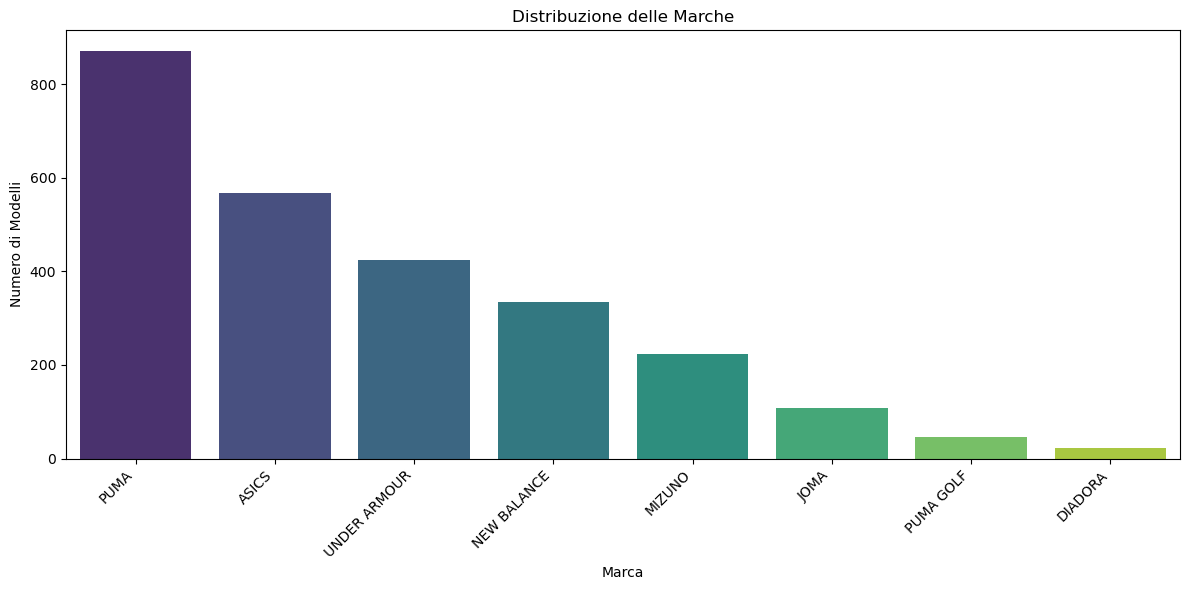

In [352]:
plt.figure(figsize=(12, 6))
sns.barplot(x=marca_somma.index, y=marca_somma.values, hue=marca_somma.index, palette="viridis", legend=False)

plt.title('Distribuzione delle Marche')

plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

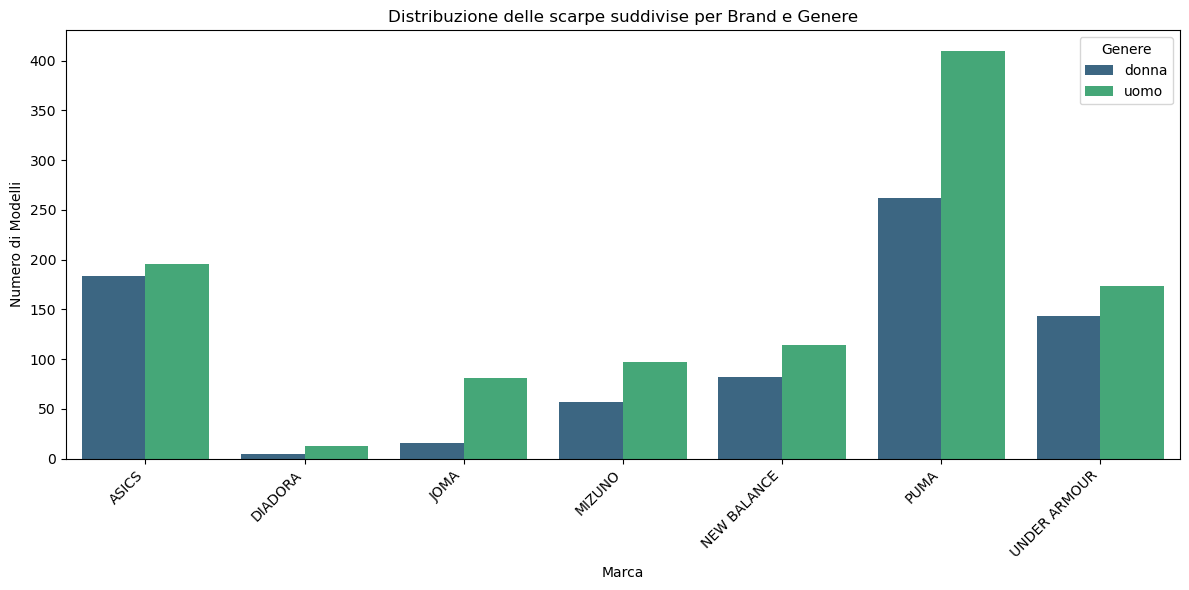

In [355]:
marca_genere_somma = modello_unici.groupby(['marca', 'genere']).size().reset_index(name='Numero')

plt.figure(figsize=(12, 6))
sns.barplot(data=marca_genere_somma, x='marca', y='Numero', hue='genere', palette="viridis")

plt.title('Distribuzione delle scarpe suddivise per Brand e Genere')
plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()

In [362]:
# Per vedere il numero reale di modello per categoria sport prenderemmo i dati dal tms, perche df lo stesso modello si ripete per ogni taglia presente
sport_conteggio = modello_unici['sport'].value_counts()
print('\nNumero di modelli per categoria:')
print(sport_conteggio)


Numero di modelli per categoria:
sport
scarpe da corsa su strada                  553
scarpe da calcetto con tacchetti           295
scarpe da allenamento                      192
scarpe da basket                           173
scarpe da trail running                    147
scarpe da pallavolo                         88
scarpe da pallamano                         68
da tennis per terra battuta                 61
scarpe da tennis per tutte le superfici     58
scarpe da calcetto                          41
scarpe da calcio con tacchetti              36
scarpe da golf                              35
scarpe da padel                             31
scarpe da camminata                         22
ciabatte da mare                            21
scarpa da hiking                             5
scarpa da rugby                              4
scarponi da montagna                         2
stivali da neve                              1
Name: count, dtype: int64


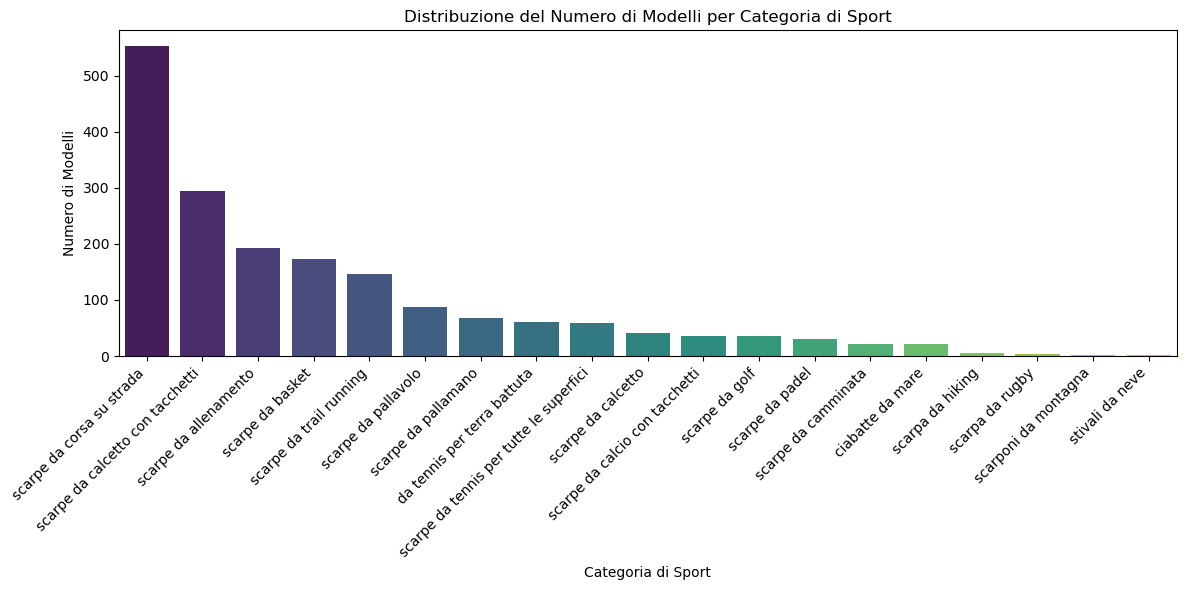

In [364]:
# prova visualizzazzione con un barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=sport_conteggio.index, y=sport_conteggio.values, hue=sport_conteggio.index, palette="viridis", legend=False)
plt.title('Distribuzione del Numero di Modelli per Categoria di Sport')
plt.xlabel('Categoria di Sport')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

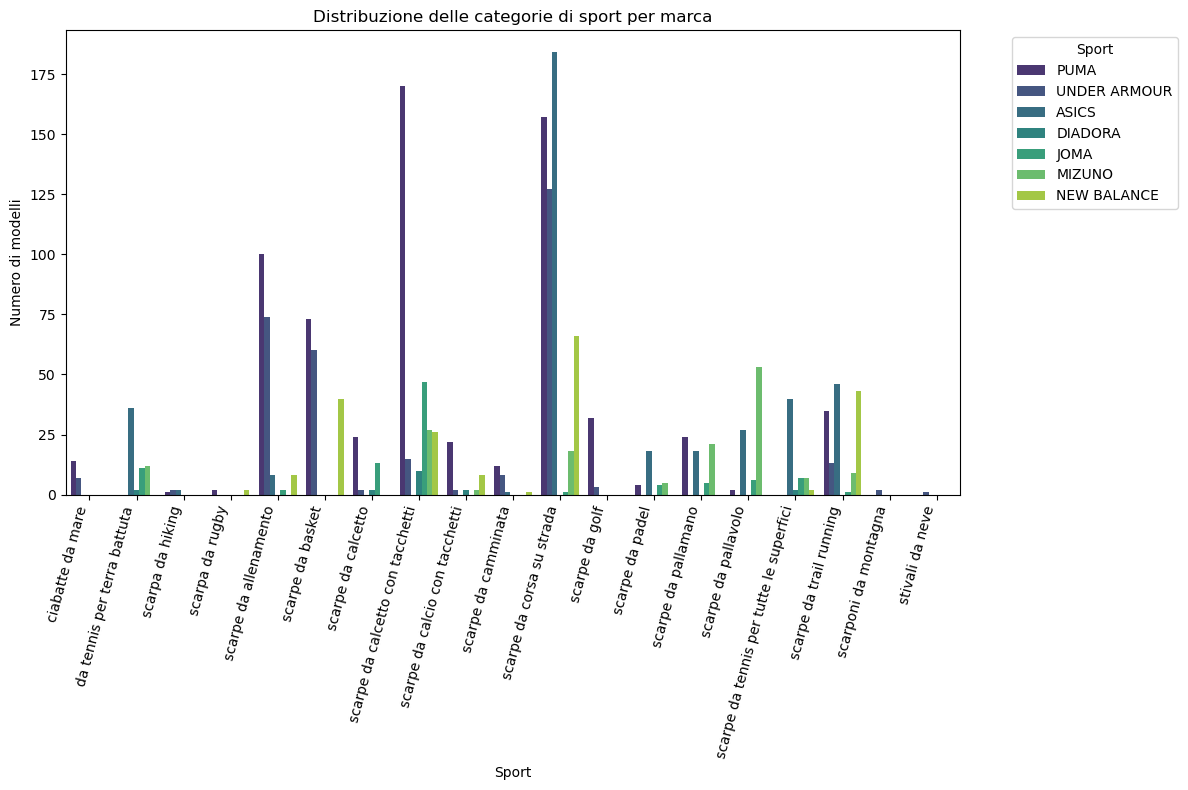

In [402]:
# Raggruppa i modelli per marca e sport e conta il numero di modelli
modelli_per_marca = modello_unici.groupby(['sport', 'marca']).size().reset_index(name='numero_modelli')

# Crea il grafico a barre
plt.figure(figsize=(12,8))
sns.barplot(x='sport', y='numero_modelli', hue='marca', data=modelli_per_marca, palette='viridis')

plt.xlabel('Sport')
plt.ylabel('Numero di modelli')
plt.title('Distribuzione delle categorie di sport per marca')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()            

### Analisi della presenza del Brand sul sito Zalando


Numero di prodotti trovati sul sito Zalando: 4192

Numero di prodotti da ciascuna marca:
marca
PUMA            20042
ASICS           11119
UNDER ARMOUR     5822
MIZUNO           4192
NEW BALANCE      2422
JOMA              704
DIADORA           167
Name: count, dtype: int64


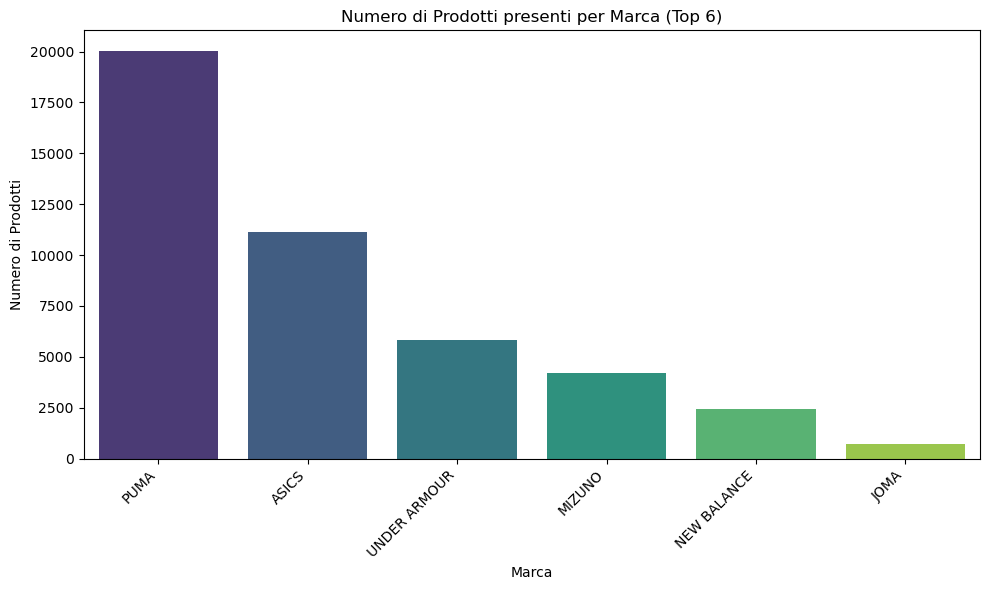

In [369]:
brand = 'MIZUNO'

# Numero totale di modelli offerti dal brand del committente
num_prodotti = len(df_esteso[df_esteso['marca'] == brand])
print(f"\nNumero di prodotti trovati sul sito Zalando: {num_modelli}")

# Confronto con i competitor (numero di modelli per marca)
prod_per_marca = df_esteso['marca'].value_counts()
print("\nNumero di prodotti da ciascuna marca:")
print(prod_per_marca)

# Visualizzazione del confronto (top competitor)
top_n_marche = prod_per_marca.nlargest(6) # Include il brand del committente e i 5 competitor principali
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_marche.index, y=top_n_marche.values, hue=top_n_marche.index, palette="viridis", legend=False)
plt.title('Numero di Prodotti presenti per Marca (Top 6)')
plt.xlabel('Marca')
plt.ylabel('Numero di Prodotti')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [255]:
# raggruppa i dati per categoria di sport
raggruppa_sport_marca = df.groupby(['sport', 'marca'])[['prezzo_effettivo', 'prezzo_ordinario']].sum()

In [256]:
raggruppa_sport_marca  = raggruppa_sport_marca .sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])
raggruppa_sport_marca 

,,prezzo_effettivo,prezzo_ordinario
sport,marca,,
scarpe da trail running,JOMA,50.00,50.00
Scarpe da corsa su strada,UNDER ARMOUR,160.00,160.00
scarpe da corsa su strada,JOMA,238.65,238.65
scarpe da calcetto,DIADORA,364.95,364.95
scarpa da hiking,PUMA,414.75,550.00
...,...,...,...
scarpe da corsa su strada,PUMA,92676.81,110342.47
sneakers basse,NEW BALANCE,113662.38,113662.38
scarpe da corsa su strada,UNDER ARMOUR,117341.24,124461.90


### Analisi per categoria 'sport'

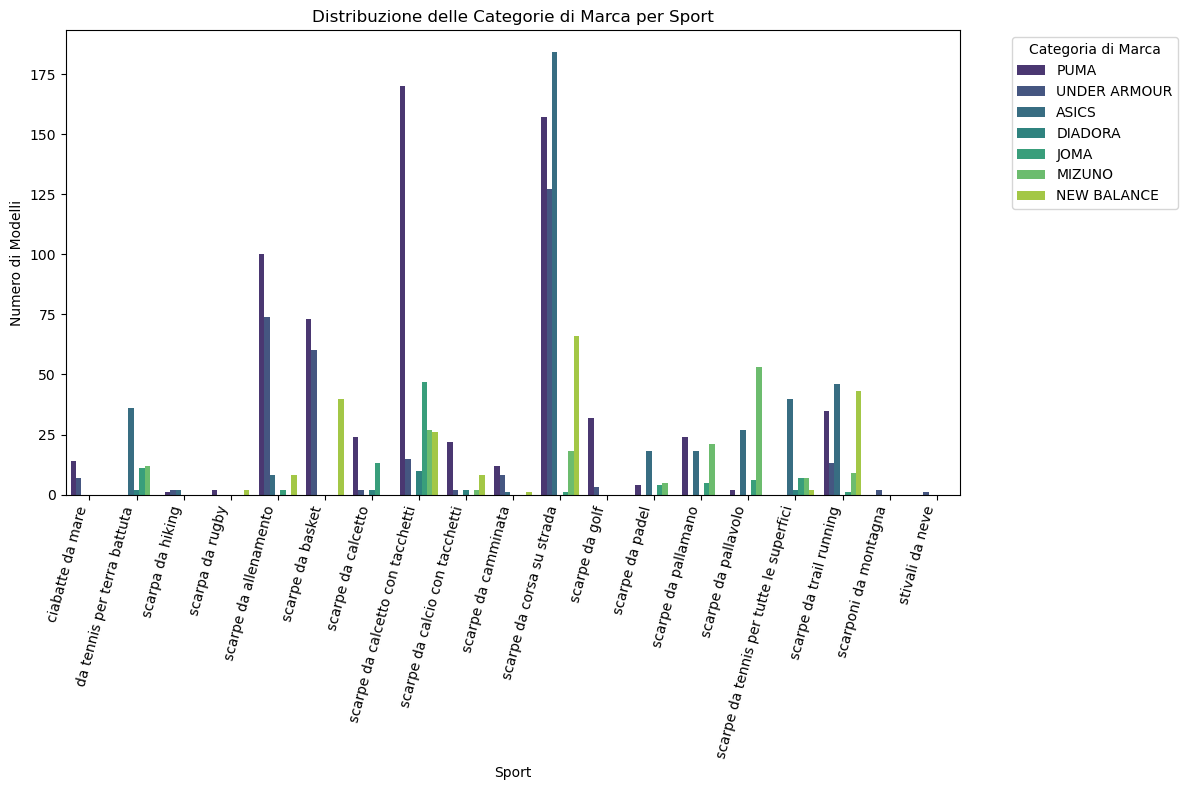

Categoria di scarpa offerta da ogni marca:
          marca                                              sport
0         ASICS  [scarpe da corsa su strada, scarpe da trail ru...
1       DIADORA  [scarpe da calcetto con tacchetti, scarpe da t...
2          JOMA  [scarpe da pallavolo, scarpe da pallamano, sca...
3        MIZUNO  [scarpe da pallavolo, scarpe da pallamano, sca...
4   NEW BALANCE  [scarpe da basket, scarpe da corsa su strada, ...
5          PUMA  [scarpe da allenamento, scarpe da basket, scar...
6  UNDER ARMOUR  [scarpe da allenamento, scarpe da corsa su str...

Categoria di scarpa offerta da ogni marca (formato leggibile):
Marca: ASICS
Sport: scarpe da corsa su strada, scarpe da trail running, da tennis per terra battuta, scarpa da hiking, scarpe da camminata, scarpe da tennis per tutte le superfici, scarpe da padel, scarpe da pallamano, scarpe da pallavolo, scarpe da allenamento
------------------------------
Marca: DIADORA
Sport: scarpe da calcetto con tacchetti, scarpe d

In [435]:
# 1. Grafico per vedere ogni marca quale categoria di sport rientra:

# Calcola il numero di modelli per ogni combinazione di marca e sport
modello_unici.groupby(['marca', 'sport'])['sport'].value_counts().sort_values(ascending=False)

# Crea il grafico a barre impilate
plt.figure(figsize=(12, 8))
sns.barplot(x='sport', y='numero_modelli', hue='marca', data=modelli_per_marca_sport, palette='viridis')

# Aggiungi etichette e titolo
plt.xlabel('Sport')
plt.ylabel('Numero di Modelli')
plt.title('Distribuzione delle Categorie di Marca per Sport')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Categoria di Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Codice per vedere ogni marca che sport ha:

# Trova gli sport unici per ogni marca
sport_per_marca = modello_unici.groupby('marca')['sport'].unique().reset_index()

# Stampa il risultato
print("Categoria di scarpa offerta da ogni marca:")
print(sport_per_marca)

# Vusualizzazione del risultato
print("\nCategoria di scarpa offerta da ogni marca (formato leggibile):")
for index, row in sport_per_marca.iterrows():
    print(f"Marca: {row['marca']}")
    print(f"Sport: {', '.join(row['sport'])}")
    print("-" * 30)


### Distribuzione dei prezzi per ogni brand e confronto con il brand MIZUNO

In [441]:
conteggio_sport_tutti = modello_unici.groupby(['marca', 'sport'])['sport'].value_counts().sort_values(ascending=False)
print("\nNumero di modelli per categoria di sport offerti dalle brand:")
print(conteggio_sport_tutti)

# Filtra il DataFrame per includere solo i dati di "MIZUNO"
mizuno_data = modello_unici[modello_unici['marca'] == 'MIZUNO']

# Ottieni le categorie di sport uniche offerte da "MIZUNO"
sport_mizuno = mizuno_data['sport'].unique()

# Stampa le categorie di sport
print(f"Categorie di sport offerte da MIZUNO: {sport_mizuno}")

# Se vuoi contare quanti modelli ha Mizuno per ogni sport:
conteggio_sport_mizuno = mizuno_data['sport'].value_counts()
print("\nNumero di modelli per categoria di sport offerti da MIZUNO:")
print(conteggio_sport_mizuno)


Numero di modelli per categoria di sport offerti dalle brand:
marca         sport                           
ASICS         scarpe da corsa su strada           184
PUMA          scarpe da calcetto con tacchetti    170
              scarpe da corsa su strada           157
UNDER ARMOUR  scarpe da corsa su strada           127
PUMA          scarpe da allenamento               100
                                                 ... 
JOMA          scarpe da corsa su strada             1
ASICS         scarpe da camminata                   1
JOMA          scarpe da trail running               1
PUMA          scarpa da hiking                      1
UNDER ARMOUR  stivali da neve                       1
Name: count, Length: 71, dtype: int64
Categorie di sport offerte da MIZUNO: ['scarpe da pallavolo' 'scarpe da pallamano'
 'scarpe da calcetto con tacchetti' 'da tennis per terra battuta'
 'scarpe da trail running' 'scarpe da corsa su strada'
 'scarpe da tennis per tutte le superfici' 'scarpe da 

In [449]:
distribuzione_prezzi = modello_unici.groupby('sport')['prezzo_effettivo'].mean().unstack()
distribuzione_prezzi

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

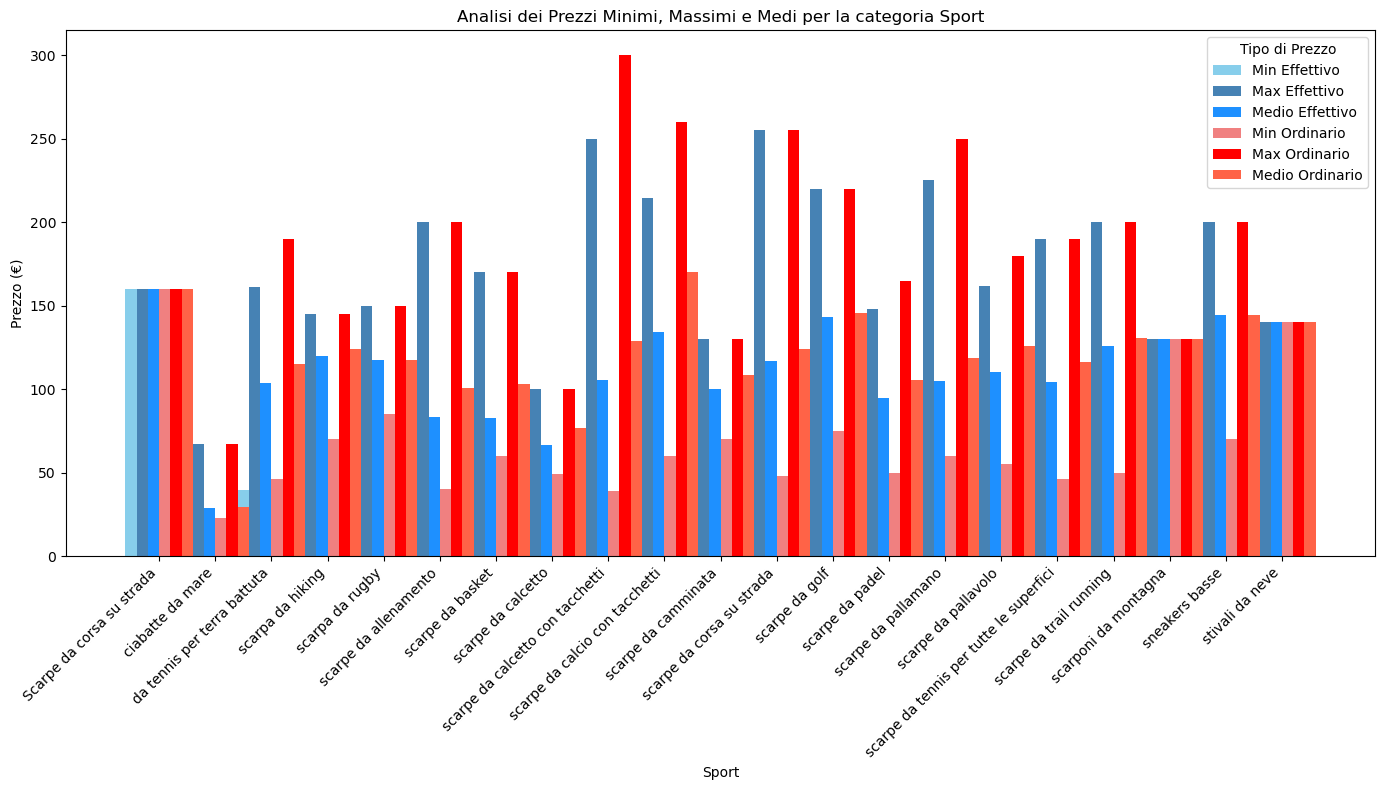

In [262]:
# Calcolo delle statistiche di prezzo per sport
prezzi_sport = tms.groupby('sport').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.2

# Posizioni delle barre per ciascuna statistica di prezzo
pos_min_eff = np.arange(len(prezzi_sport))
pos_max_eff = [p + bar_width for p in pos_min_eff]
pos_med_eff = [p + bar_width * 2 for p in pos_min_eff]
pos_min_ord = [p + bar_width * 3 for p in pos_min_eff]
pos_max_ord = [p + bar_width * 4 for p in pos_min_eff]
pos_med_ord = [p + bar_width * 5 for p in pos_min_eff]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_sport['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_sport['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_sport['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_sport['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_sport['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_sport['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Sport')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per la categoria Sport')
plt.xticks(pos_min_eff + bar_width * 2.5, prezzi_sport['sport'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

### Distribuzione del numero di prodotti per categoria di sport per vedere quali categorie sono piu presenti sul sito Zalando

In [265]:
# conteggio dei prodotti per categoria
conteggio = tms.groupby('sport')['nome_prodotto'].count()
conteggio

sport
Scarpe da corsa su strada                    1
ciabatte da mare                            25
da tennis per terra battuta                 87
scarpa da hiking                             6
scarpa da rugby                              8
scarpe da allenamento                      245
scarpe da basket                           229
scarpe da calcetto                          52
scarpe da calcetto con tacchetti           387
scarpe da calcio con tacchetti              50
scarpe da camminata                         33
scarpe da corsa su strada                  768
scarpe da golf                              51
scarpe da padel                             47
scarpe da pallamano                        105
scarpe da pallavolo                        121
scarpe da tennis per tutte le superfici     80
scarpe da trail running                    204
scarponi da montagna                         2
sneakers basse                              95
stivali da neve                              2
Name: n

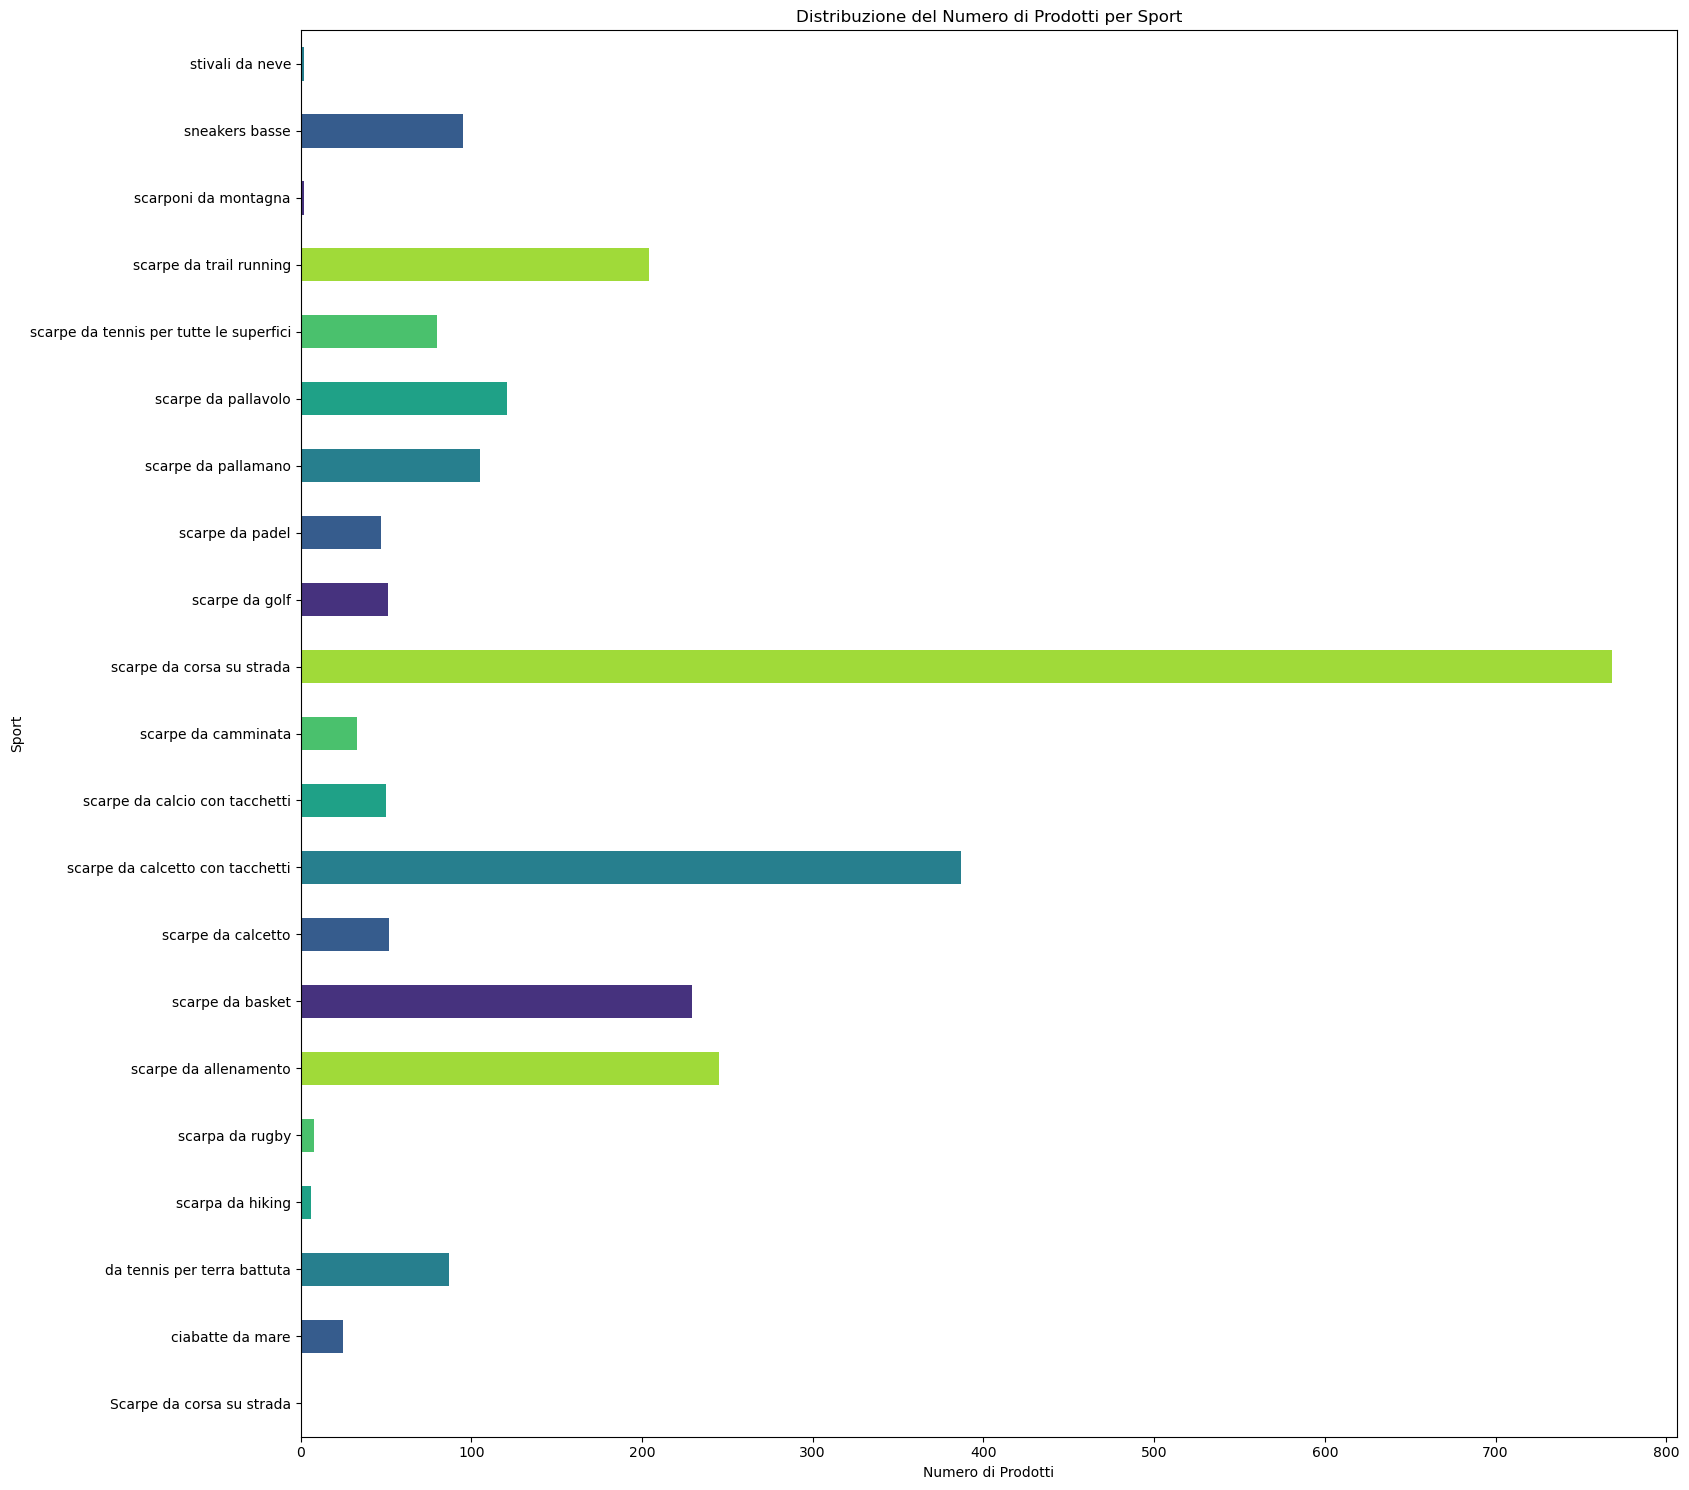

In [267]:
# Creazione del grafico a barre orizzontali
plt.figure(figsize=(17, 15))
conteggio.plot(kind='barh', color=sns.color_palette('viridis'))

# Aggiunta di etichette e titolo
plt.xlabel('Numero di Prodotti')
plt.ylabel('Sport')
plt.title('Distribuzione del Numero di Prodotti per Sport')

# Mostra il grafico
plt.tight_layout()
plt.show()

### Distribuzione dei prezzi per Categoria Sport in maniera tale che possiamo visualizzare e identificare eventuale categorie di Sport con prezzi variabili
### Abbiamo scelto di utilizzare un boxplot

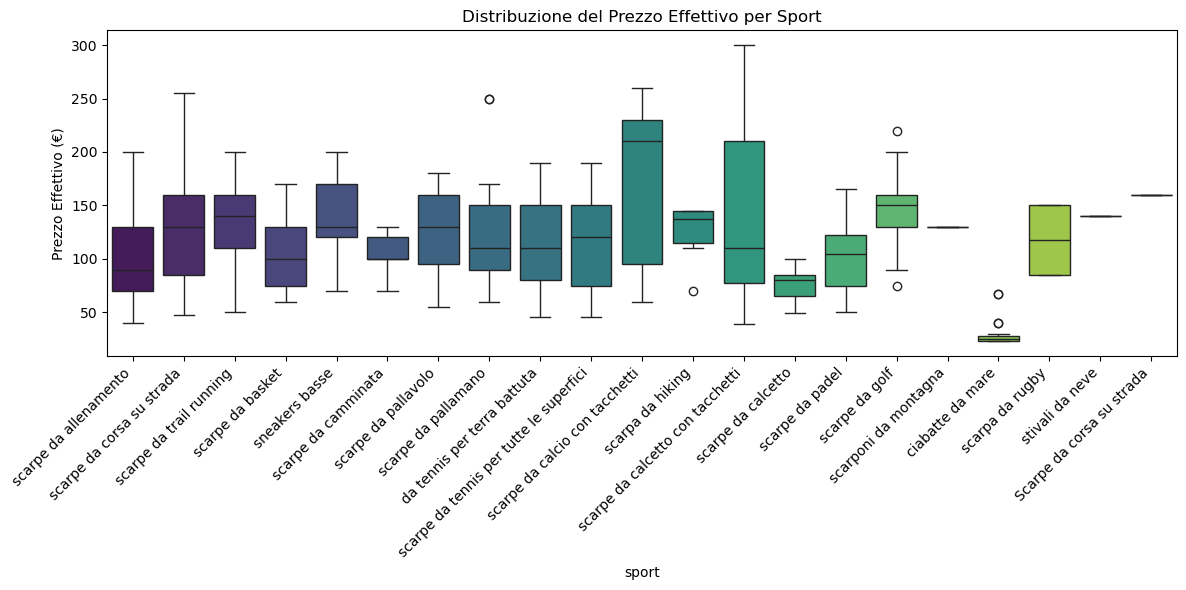

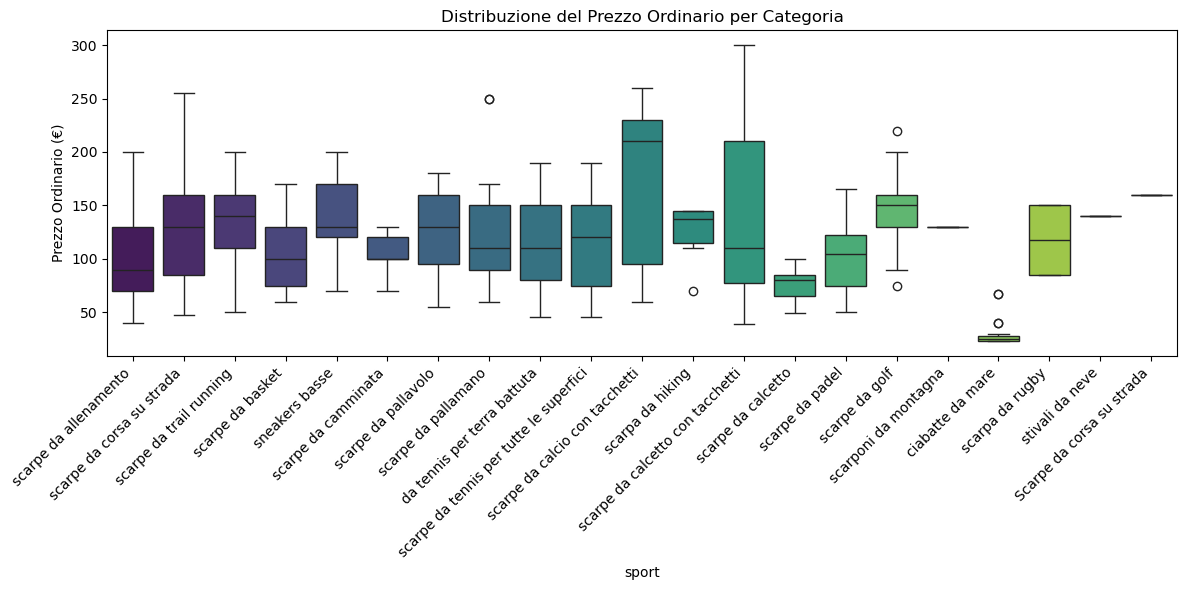

In [270]:
# Creazione del box plot per il prezzo effettivo per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=tms, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Effettivo (€)')
plt.title('Distribuzione del Prezzo Effettivo per Sport')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()

# Creazione del box plot per il prezzo ordinario per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=tms, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Ordinario (€)')
plt.title('Distribuzione del Prezzo Ordinario per Categoria')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()



### Analisi dei prezzi per comprendere la distribuzione generale dei prezzi di tutti i prodotti. 
### La scelta e di utilizzare un istogramma che e ottima per visualizzare i dati sui prezzi

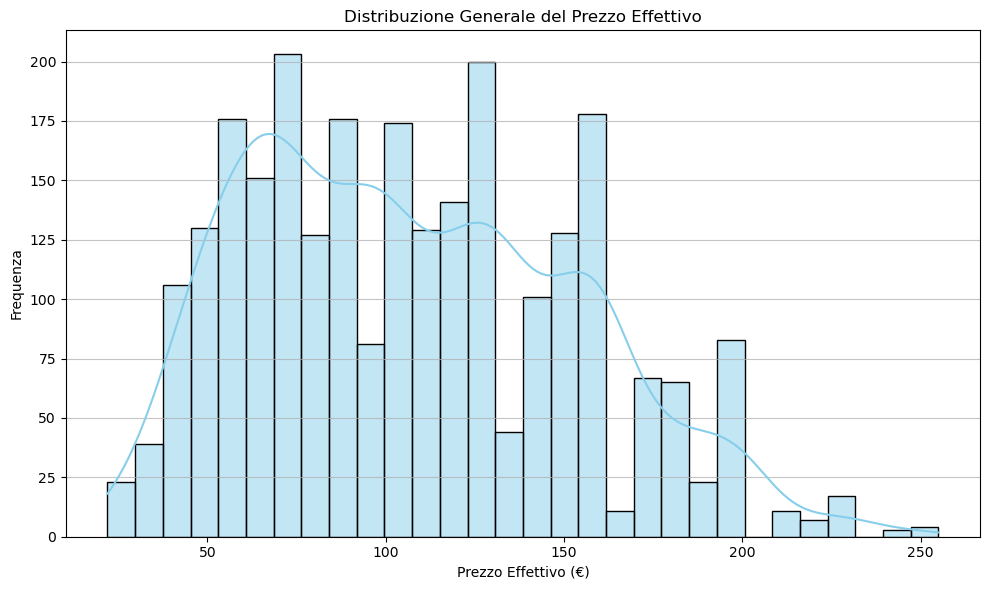

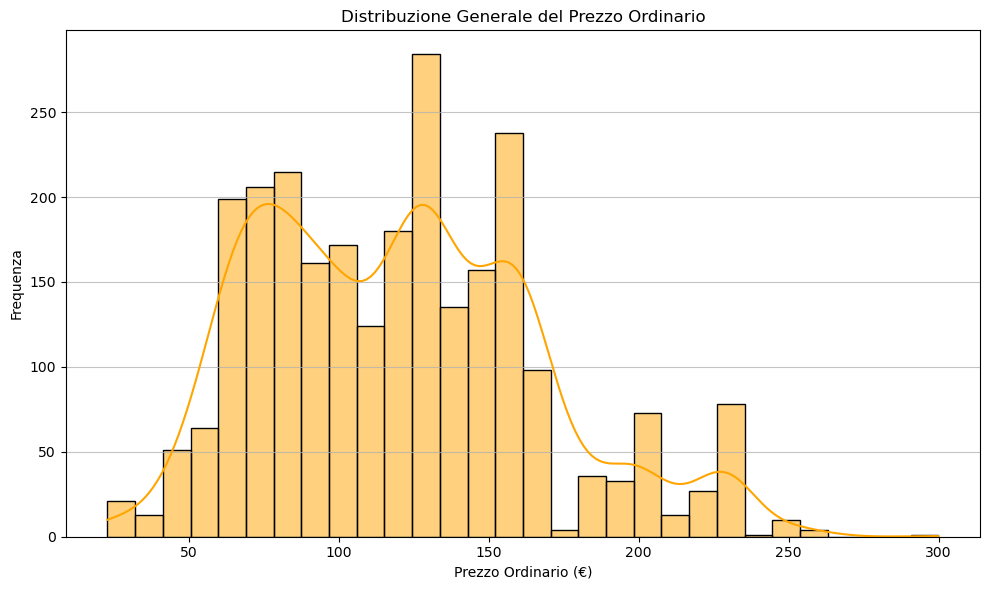

In [273]:
# Creazione dell'istogramma per il prezzo effettivo
plt.figure(figsize=(10, 6))
sns.histplot(tms['prezzo_effettivo'], bins=30, kde=True, color='skyblue')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Effettivo (€)')
plt.ylabel('Frequenza')
plt.title('Distribuzione Generale del Prezzo Effettivo')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Creazione dell'istogramma per il prezzo ordinario
plt.figure(figsize=(10, 6))
sns.histplot(tms['prezzo_ordinario'], bins=30, kde=True, color='orange')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Ordinario (€)')
plt.ylabel('Frequenza') # il numero di prodotti che hanno un prezzo all'interno di quell'intervallo
plt.title('Distribuzione Generale del Prezzo Ordinario')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

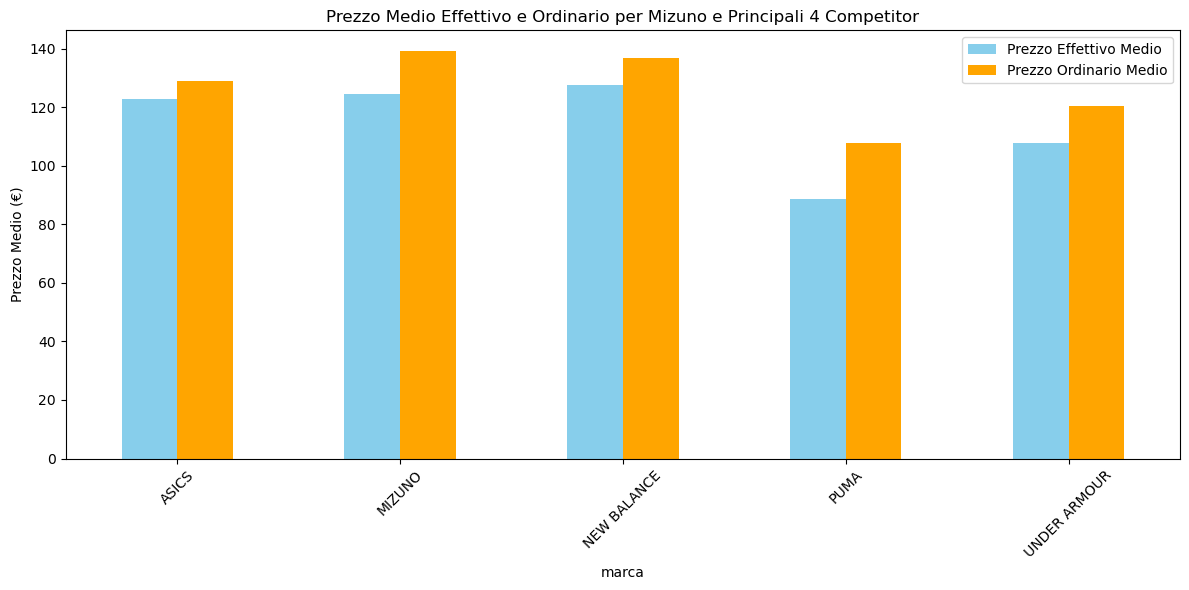

In [275]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = tms['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = tms[tms['marca'].isin(marche_da_analizzare)]

# Calcola il prezzo medio effettivo e ordinario per ogni marca
prezzi_medi_per_marca = df_marche.groupby('marca').agg(
    prezzo_effettivo_medio=('prezzo_effettivo', 'mean'),
    prezzo_ordinario_medio=('prezzo_ordinario', 'mean')
).reset_index()

# Imposta la marca come indice per facilitare il plotting
prezzi_medi_per_marca = prezzi_medi_per_marca.set_index('marca')

# Crea il grafico a barre affiancate
ax = prezzi_medi_per_marca[['prezzo_effettivo_medio', 'prezzo_ordinario_medio']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'orange'],
    rot=45
)

# Aggiungi etichette e titolo
plt.ylabel('Prezzo Medio (€)')
plt.title('Prezzo Medio Effettivo e Ordinario per Mizuno e Principali 4 Competitor')
plt.legend(['Prezzo Effettivo Medio', 'Prezzo Ordinario Medio'])
plt.tight_layout()
plt.show()

### Analisi dei prezzi Minimi, Massimi e Medi per Modello con l'aiuto di un grafico a barre raggruppante per poter visualizzare le differenze e le tendenze dei prezzi tra i diversi modelli

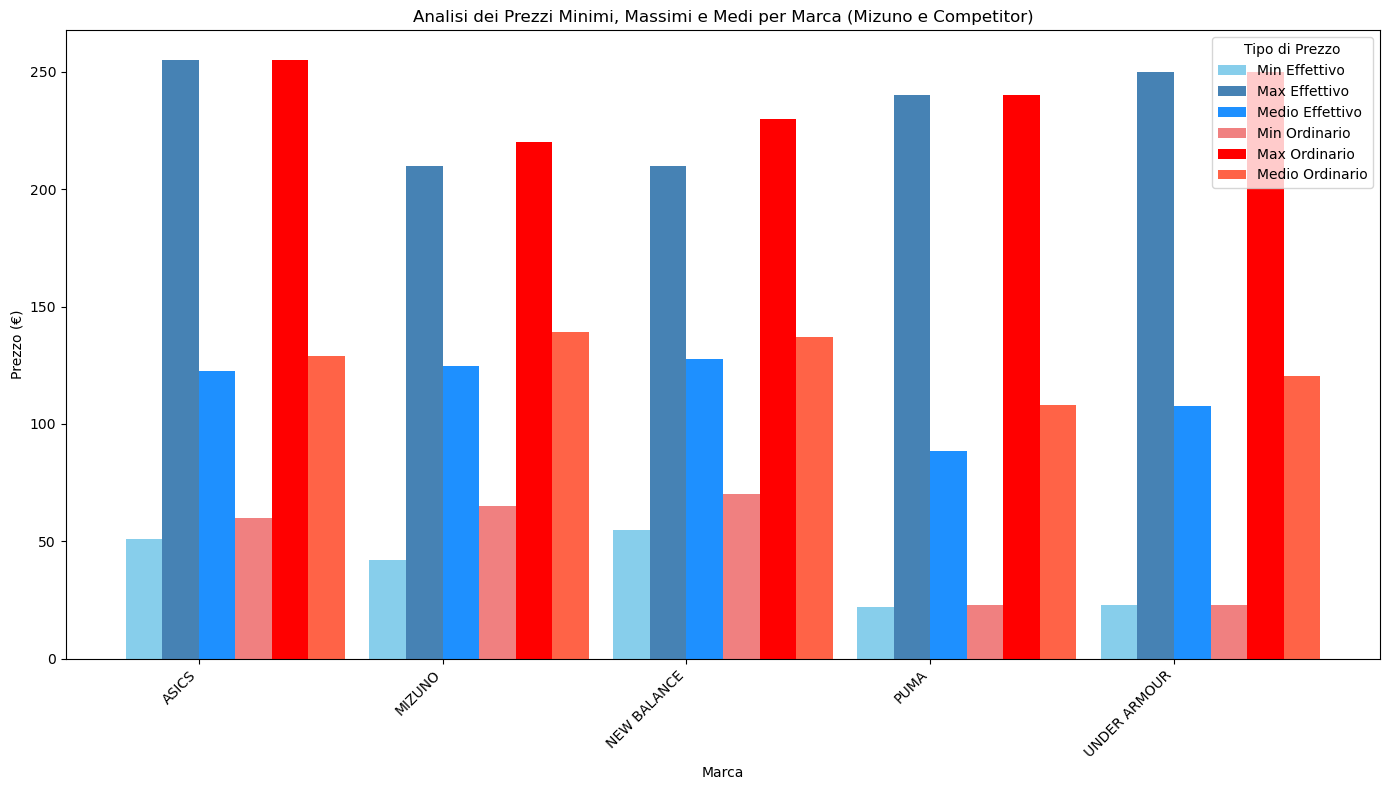

In [282]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = tms['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = tms[tms['marca'].isin(marche_da_analizzare)]

# Calcolo delle statistiche di prezzo per marca
prezzi_marca = df_marche.groupby('marca').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.15

# Posizioni delle barre per ciascuna statistica di prezzo
pos_marca = np.arange(len(prezzi_marca))
pos_min_eff = [p - bar_width * 1.5 for p in pos_marca]
pos_max_eff = [p - bar_width * 0.5 for p in pos_marca]
pos_med_eff = [p + bar_width * 0.5 for p in pos_marca]
pos_min_ord = [p + bar_width * 1.5 for p in pos_marca]
pos_max_ord = [p + bar_width * 2.5 for p in pos_marca]
pos_med_ord = [p + bar_width * 3.5 for p in pos_marca]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_marca['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_marca['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_marca['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_marca['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_marca['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_marca['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Marca')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per Marca (Mizuno e Competitor)')
plt.xticks(pos_marca, prezzi_marca['marca'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

In [284]:
df

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori
0,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,MORPHIC,scarpe da corsa su strada,white-warm white-sun struck
1,Scarpe Sportive,35.5,uomo,PUMA,PROSPECT UNISEX - Scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,PROSPECT UNISEX,scarpe da allenamento,black/yellow alert/white
2,Scarpe Sportive,35.5,uomo,PUMA,PWR HYBRID TR UNISEX - Scarpe da allenamento -...,63.95,80.00,https://www.zalando.it/puma-pwr-hybrid-tr-unis...,PWR HYBRID TR UNISEX,scarpe da allenamento,black- white- black
3,Scarpe Sportive,35.5,uomo,UNDER ARMOUR,JET '23 - Scarpe da basket - black,60.00,60.00,https://www.zalando.it/under-armour-court-perf...,JET '23,scarpe da basket,black
4,Scarpe Sportive,35.5,uomo,PUMA,ELIMINATE TURBO - Scarpe da pallamano - white/...,101.99,119.99,https://www.zalando.it/puma-eliminate-turbo-sc...,ELIMINATE TURBO,scarpe da pallamano,white/bluemazing
...,...,...,...,...,...,...,...,...,...,...,...
15284,Scarpe Sportive,47.0,donna,UNDER ARMOUR,Scarpe da corsa su strada - white,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,Unknown,scarpe da corsa su strada,white
15285,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - white/black,89.99,89.99,https://www.zalando.it/puma-unisex-scarpe-da-p...,Unknown,scarpe da allenamento,white/black
15286,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,Unknown,scarpe da allenamento,sun stream black caramel latte
15287,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,Unknown,scarpe da allenamento,black/white


In [286]:
tms

,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,sport,colori,numero_taglie
1472,donna,UNDER ARMOUR,REIGN LIFTER UNISEX - Scarpe da allenamento - ...,199.99,199.99,REIGN LIFTER UNISEX,scarpe da allenamento,black/white,22
1366,donna,UNDER ARMOUR,APPARITION - Scarpe da allenamento - white/cas...,90.99,129.99,APPARITION,scarpe da allenamento,white/castlerock/ares red,19
1488,donna,UNDER ARMOUR,Scarpe da corsa su strada - white,130.00,130.00,Unknown,scarpe da corsa su strada,white,19
1473,donna,UNDER ARMOUR,REIGN LIFTER UNISEX - Scarpe da allenamento - ...,139.99,199.99,REIGN LIFTER UNISEX,scarpe da allenamento,downpour gray/midnight navy/hyper green,19
1251,donna,PUMA,PWR HYBRID TR UNISEX - Scarpe da allenamento -...,45.95,80.00,PWR HYBRID TR UNISEX,scarpe da allenamento,black- white- black,19
...,...,...,...,...,...,...,...,...,...
2209,uomo,PUMA,KING MATCH FG/AG - Scarpe da calcetto con tacc...,62.97,74.95,KING MATCH FG/AG,scarpe da calcetto con tacchetti,persian blue pro green ultra blue,1
1371,donna,UNDER ARMOUR,CASUAL TECHNICAL - Scarpe da trail running - w...,90.00,90.00,CASUAL TECHNICAL,scarpe da trail running,white,1
401,Uomo,PUMA,ELIMINATE NITRO SQD - Scarpe da pallamano - pa...,135.99,159.99,ELIMINATE NITRO SQD,scarpe da pallamano,parisian night/white/glowing red/dark crimson,1
1040,donna,NEW BALANCE,FUELCELL REBEL V4 - Scarpe da corsa su strada ...,119.99,159.99,FUELCELL REBEL V4,scarpe da corsa su strada,blue,1
